# General Forecasting Models

Different types of models for different types of time series data

Forecasting Procedure

1. Choose a model
2. Split data into train and test sets
3. Fit model on training set
4. Evaluate model on test set
5. Re-fit model on entire dataset 
6. Forecast for future data

## Intro to Forecasting

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Read in Airline Passengers dataset

In [3]:
df = pd.read_csv('Data/airline_passengers.csv',index_col='Month', parse_dates=True)

In [4]:
df.head(3)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [5]:
df.index.freq = 'MS'

In [6]:
df.tail(3)

,Thousands of Passengers
Month,
1960-10-01,461
1960-11-01,390
1960-12-01,432


We need to forecast data from 1961-01-01.
The test set size should be at least as large as the maximum forecast horizon required.

The longer the forecast horizon , the more likely your prediction becomes less accurate

In [7]:
df.shape

(144, 1)

In [9]:
train = df.iloc[:109] # or loc[:'1950-01-01']. location. iloc-indexlocation
test = df.iloc[108:]

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
fitted_model = ExponentialSmoothing(train['Thousands of Passengers'], trend='mul', seasonal='mul',
                                   seasonal_periods=12).fit() #12 entries per seasonal period. Yearly seasonal pattern so.

Forecast

In [12]:
test_predictions = fitted_model.forecast(36) #3years

In [13]:
test_predictions

1958-02-01    339.139712
1958-03-01    399.277032
1958-04-01    394.227755
1958-05-01    402.541455
1958-06-01    473.130959
1958-07-01    521.798028
1958-08-01    514.520301
1958-09-01    446.219034
1958-10-01    385.429920
1958-11-01    339.644146
1958-12-01    381.451439
1959-01-01    401.208789
1959-02-01    387.155441
1959-03-01    455.807062
1959-04-01    450.042903
1959-05-01    459.533665
1959-06-01    540.117299
1959-07-01    595.674698
1959-08-01    587.366584
1959-09-01    509.395157
1959-10-01    439.999462
1959-11-01    387.731293
1959-12-01    435.457703
1960-01-01    458.012318
1960-02-01    441.969284
1960-03-01    520.340668
1960-04-01    513.760413
1960-05-01    524.594887
1960-06-01    616.587630
1960-07-01    680.010900
1960-08-01    670.526515
1960-09-01    581.515818
1960-10-01    502.295012
1960-11-01    442.626666
1960-12-01    497.110227
1961-01-01    522.858147
Freq: MS, dtype: float64

Plot Real Data first

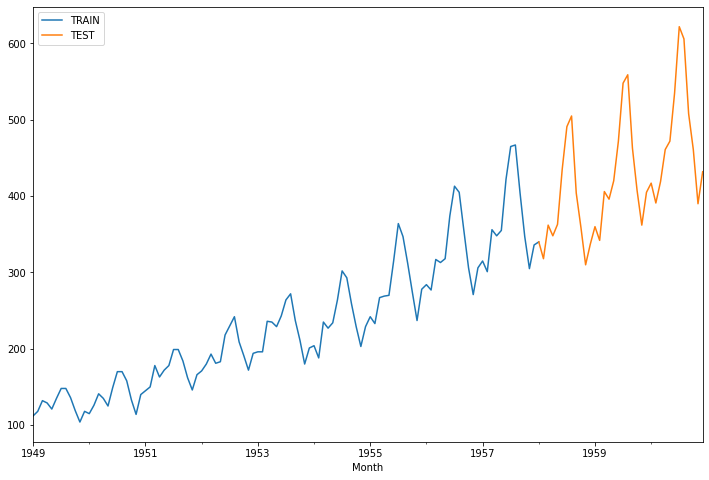

In [17]:
train['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8));
test['Thousands of Passengers'].plot(legend=True,label='TEST');

### Plot Test Prediction

Remove xlim to view full plot

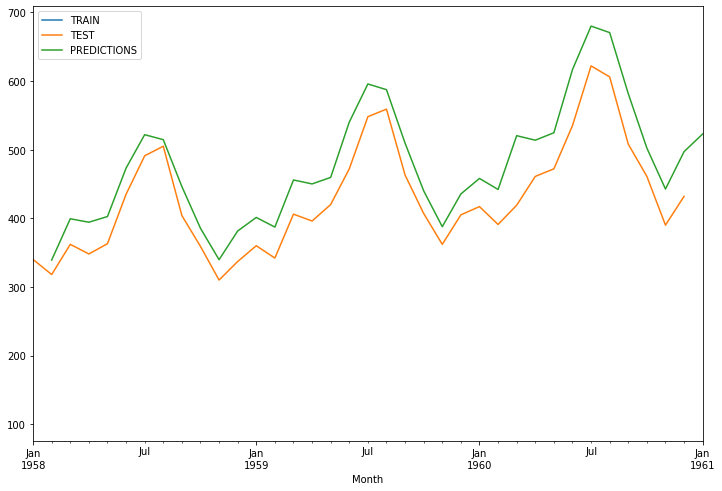

In [19]:
train['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8));
test['Thousands of Passengers'].plot(legend=True,label='TEST');
test_predictions.plot(legend=True,label='PREDICTIONS', xlim=['1958-01-01','1961-01-01']);

### Evaluate Predictions

We basically use the evaluation metrics for regression.

1. Mean Absolute Error - MAE ---> Average of Sum of |y-y^| ----> Issue - Few large errors might miss attention
2. Mean Squared Error - MSE ---> Average of Sum of (y-y^)^2 ----> Issue - Units are also squared which is hard to interpret
3. Root Mean Squared Error - RMSE ---> Root of MSE

Ideal value of RMSE --> My suggestion would be that RMSE should be below 10 percent of the average of test data.

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [32]:
print("MAE:",mean_absolute_error(test,test_predictions).round(4))
print("Percent of Average of Test Data:",(mean_absolute_error(test,test_predictions)*100/test.mean().values[0]).round(2))

MAE: 63.0302
Percent of Average of Test Data: 14.71


In [41]:
rmse = np.sqrt(mean_squared_error(test,test_predictions))
print("RMSE:",rmse)
print("Percent of Average of Test Data:",rmse*100/test.mean().values[0])

RMSE: 74.92727460739599
Percent of Average of Test Data: 17.48594506590338


In [43]:
test.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


## Forecast into future

In [44]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul',seasonal='mul', seasonal_periods=12).fit()

In [45]:
forecast_predictions = final_model.forecast(36)

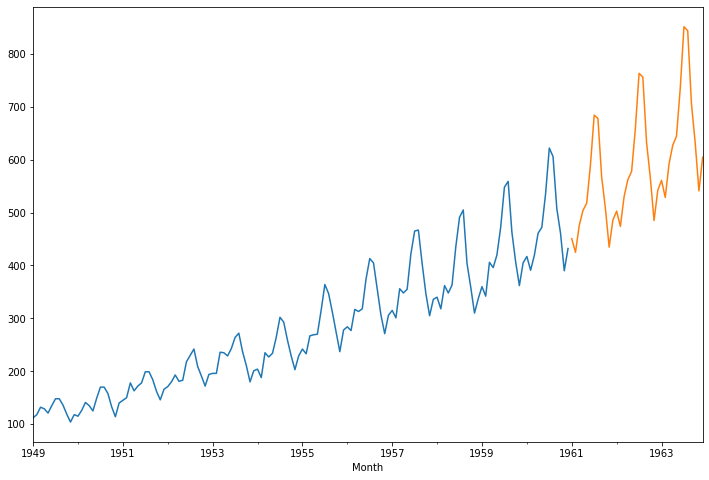

In [46]:
df['Thousands of Passengers'].plot(figsize=(12,8));
forecast_predictions.plot();

## Stationarity and Differencing

A Time Series is said to be stationary when it doesn't exhibit any trend or seasonality. i.e fluctuation in data are entirely due to outside forces and noise.

Sample Stationary Dataset

In [49]:
df2 = pd.read_csv('Data/samples.csv',index_col=0, parse_dates=True)

In [50]:
df2.head(5)

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


Stationary Data

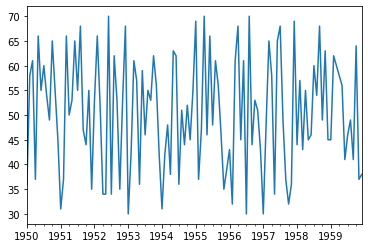

In [52]:
df2['a'].plot();

Non-Stationary Data

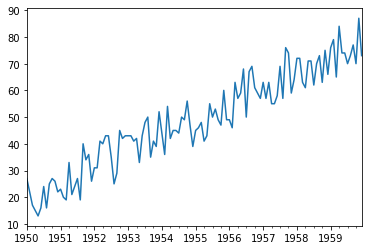

In [54]:
df2['b'].plot();

There are also statistical tests that quantitatively assess and tell you if a data is stationary or not.
We just assessed visually. It may not be obvious all the time to assess visually.

## Non-stationary data can be made to look stationary through differencing

Differencing basically calculates difference between consecutive points

In [56]:
from statsmodels.tsa.statespace.tools import diff

Do differencing manually - Level 1 differencing

In [59]:
df2['b']

1950-01-01    27
1950-02-01    22
1950-03-01    17
1950-04-01    15
1950-05-01    13
              ..
1959-08-01    73
1959-09-01    77
1959-10-01    70
1959-11-01    87
1959-12-01    73
Name: b, Length: 120, dtype: int64

In [58]:
df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

<AxesSubplot:>

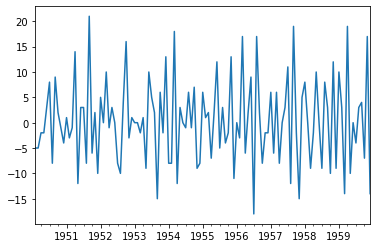

In [61]:
diff(df2['b'],k_diff=1).plot()

## ACF and PACF are just different functions to plot out out time series data to pick out components and parameters required for ARIMA based models

AutoCorrelation function and Partial AutoCorrelation Function

### ACF
An AutoCorrelation plot shows the correlation of the series with itself lagged by x time units.

So y axis is the correlation and x axis is the no of time units of lag.

Autocorelation for lag 1 just answers the question "How correlated are today's sales to yesterday's sales?"

## PACF

Plot Sales on Day i(y axis) vs Sales on Day i-1 and fit a linear regression best fit line and calculate residuals.

Now plot that residual vs Sales on Day i-1.

Now calculate residual fitted on Day i-1 and plot vs Sales on day i-2 and repeat.

### ACF describes autocorrelation between an observation and another observation at a prior timestep THAT INCLUDE DIRECT AND INDIRECT DEPENDENCE INFORMATION

### PACF only describes the DIRECT relationship between an observation and its lag

These 2 plots can help choose order parameters for ARIMA based models.

But, it is better to perform a grid search  of parameter values rather than attempting to read these plots directly.

In [64]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

Load one Non-Stationary and Stationary Dataset

In [65]:
df1 = pd.read_csv('Data/airline_passengers.csv',index_col="Month", parse_dates=True)
df1.index.freq ='MS'
df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D' #Daily Data

In [67]:
df1.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [68]:
df2.head(5)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Code to ignore warnings

In [70]:
import warnings
warnings.filterwarnings('ignore')

Generate your own dataframe

In [71]:
df = pd.DataFrame({'a':[13,5,11,12,9]})

In [72]:
df.head()

,a
0,13
1,5
2,11
3,12
4,9


In [73]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [76]:
pacf_yw(df['a'], nlags=4, method = 'mle') #Method is either mle or unbiased. yw - yuler Walker equation

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [77]:
pacf_ols(df['a'],nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

The reason why there are different ways of calculating pacf function is because there are different ways for calculating correlation itself. We would be aware of the popular Pearsons' Correlation.

Now plot acf and pacf using default statsmodels settings

In [79]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

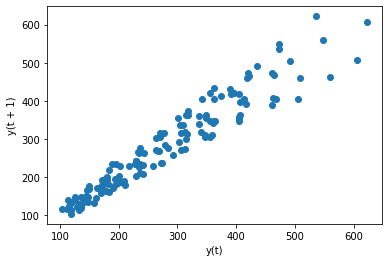

In [80]:
lag_plot(df1['Thousands of Passengers'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

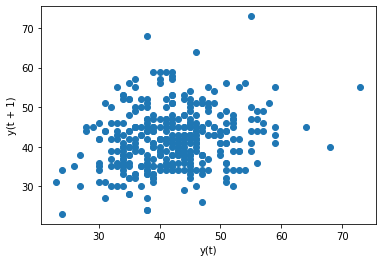

In [82]:
lag_plot(df2['Births'])

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

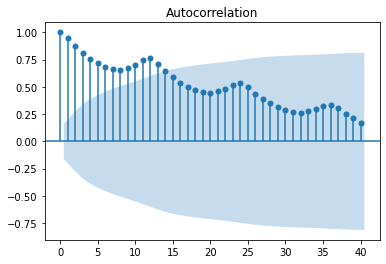

In [86]:
plot_acf(df1,lags=40);

Shaded region represents 95% confidence interval. Outside this region , correlation values are significant.

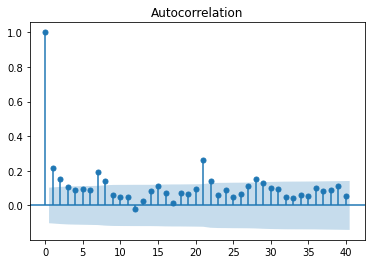

In [87]:
plot_acf(df2,lags=40);

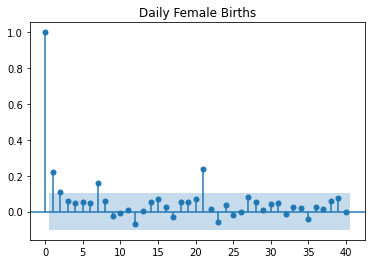

In [89]:
plot_pacf(df2,lags=40,title='Daily Female Births');

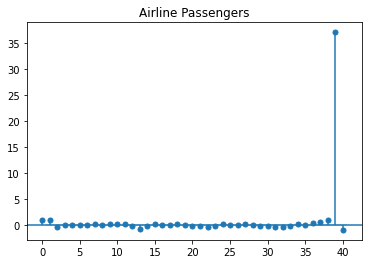

In [90]:
plot_pacf(df1,lags=40,title='Airline Passengers');